## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

## Functions

In [2]:
def plot_function(X, Y, fn, linewidth=0, title=''):
    X, Y = np.meshgrid(X, Y)
    Z = fn(X, Y)
    
    # Create figure.
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)

    plt.show()
    


# 1. The Concept of Curvature ($\kappa$)

Curvature, denoted by the Greek letter $\kappa$ (kappa), is formally defined as the magnitude of the rate of change of the **unit tangent vector** with respect to the **arc length** ($s$).

$$
\kappa = \left\| \frac{d\mathbf{T}}{ds} \right\|
$$

*   **Unit Tangent Vector ($\mathbf{T}$):** This vector points in the direction of the curve's motion and has a length of 1. It only captures the *direction* of the curve.
*   **Arc Length ($s$):** This is the actual distance traveled along the curve.

Since calculating derivatives with respect to arc length is often complicated, we use a more practical formula that involves the derivatives with respect to the parameter $t$.

---

# 2. The Practical Formula

The most common formula for the curvature $\kappa$ of a curve $\mathbf{r}(t)$ is:

$$
\kappa(t) = \frac{\|\mathbf{r}'(t) \times \mathbf{r}''(t)\|}{\|\mathbf{r}'(t)\|^3}
$$

*   $\mathbf{r}'(t)$ is the first derivative (velocity vector).
*   $\mathbf{r}''(t)$ is the second derivative (acceleration vector).
*   $\times$ is the cross product (which is simplified for 2D curves).

---

# 3. Example: $S(t) = \langle t, \sin(\pi t) \rangle$

Let's find the curvature for the curve $\mathbf{r}(t) = \langle t, \sin(\pi t) \rangle$.

### Step 1: Find the First Derivative (Velocity) $\mathbf{r}'(t)$

$$
\mathbf{r}'(t) = \frac{d}{dt} \langle t, \sin(\pi t) \rangle = \langle 1, \pi \cos(\pi t) \rangle
$$

### Step 2: Find the Second Derivative (Acceleration) $\mathbf{r}''(t)$

$$
\mathbf{r}''(t) = \frac{d}{dt} \langle 1, \pi \cos(\pi t) \rangle = \langle 0, -\pi^2 \sin(\pi t) \rangle
$$

### Step 3: Calculate the Cross Product $\mathbf{r}'(t) \times \mathbf{r}''(t)$

Since this is a 2D curve, we treat it as a 3D curve with a $z$-component of zero:
$\mathbf{r}'(t) = \langle 1, \pi \cos(\pi t), 0 \rangle$
$\mathbf{r}''(t) = \langle 0, -\pi^2 \sin(\pi t), 0 \rangle$

The cross product will only have a $\mathbf{k}$ (or $z$) component:

$$
\mathbf{r}'(t) \times \mathbf{r}''(t) = \begin{vmatrix} \mathbf{i} & \mathbf{j} & \mathbf{k} \\ 1 & \pi \cos(\pi t) & 0 \\ 0 & -\pi^2 \sin(\pi t) & 0 \end{vmatrix}
$$

$$
\mathbf{r}'(t) \times \mathbf{r}''(t) = \mathbf{k} \left[ (1)(-\pi^2 \sin(\pi t)) - (\pi \cos(\pi t))(0) \right]
$$

$$
\mathbf{r}'(t) \times \mathbf{r}''(t) = \langle 0, 0, -\pi^2 \sin(\pi t) \rangle
$$

### Step 4: Find the Magnitude of the Cross Product

$$
\|\mathbf{r}'(t) \times \mathbf{r}''(t)\| = \sqrt{0^2 + 0^2 + (-\pi^2 \sin(\pi t))^2} = \sqrt{\pi^4 \sin^2(\pi t)}
$$

$$
\|\mathbf{r}'(t) \times \mathbf{r}''(t)\| = \pi^2 |\sin(\pi t)|
$$

### Step 5: Find the Magnitude of the Velocity Vector

$$
\|\mathbf{r}'(t)\| = \sqrt{1^2 + (\pi \cos(\pi t))^2} = \sqrt{1 + \pi^2 \cos^2(\pi t)}
$$

### Step 6: Calculate the Curvature $\kappa(t)$

Substitute the results into the curvature formula:

$$
\kappa(t) = \frac{\|\mathbf{r}'(t) \times \mathbf{r}''(t)\|}{\|\mathbf{r}'(t)\|^3}
$$

$$
\kappa(t) = \frac{\pi^2 |\sin(\pi t)|}{\left( \sqrt{1 + \pi^2 \cos^2(\pi t)} \right)^3}
$$

$$
\kappa(t) = \frac{\pi^2 |\sin(\pi t)|}{\left( 1 + \pi^2 \cos^2(\pi t) \right)^{3/2}}
$$

This formula gives the curvature at any point $t$ along the curve. For example, when $t=0$, $\sin(0)=0$ and $\cos(0)=1$, so $\kappa(0) = 0$. This makes sense because at $t=0$, the curve is momentarily flat (not bending). 📏


# Radius of Curvature ($\rho$) ⭕

The radius of curvature is the **reciprocal** of the curvature.

$$
\rho = \frac{1}{\kappa}
$$

### What Does It Mean?

At any point on a curve, the radius of curvature is the radius of the circle that best approximates the curve at that specific point. This circle is called the **osculating circle** (or "kissing circle").

*   **High Curvature ($\kappa$ is large):** The curve is bending sharply. The radius of curvature ($\rho$) is **small**. (Think of a small, tight circle).
*   **Low Curvature ($\kappa$ is small):** The curve is nearly straight. The radius of curvature ($\rho$) is **large**. (Think of a huge, nearly flat circle).

In simple terms, the radius of curvature tells you how big the circle is that "fits" the bend of the curve at that moment.

In [3]:
t = np.arange(0, 5, 0.025)
S = [t, np.sin(np.pi * t)]

tangent = lambda t : (1.0 / np.sqrt(1 + (np.pi * np.cos(np.pi * t))**2), 
                     np.pi * np.cos(np.pi * t) / np.sqrt(1 + (np.pi * np.cos(np.pi * t))**2))
U, V = tangent(t)

## Plot S(t) and T(t)

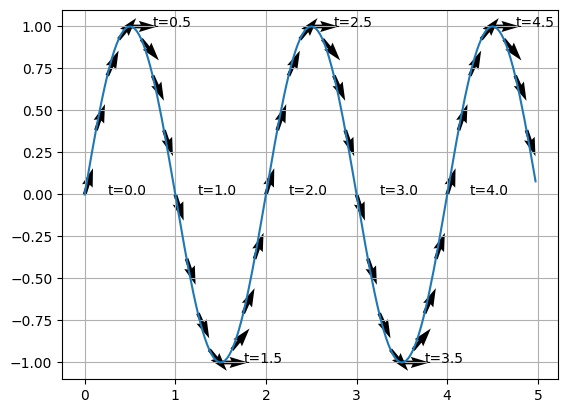

In [4]:
d = 20
plt.plot(S[0], S[1])
for x_i, y_i, t_i in zip(S[0][::d], S[1][::d], t[::d]):
    plt.text(x_i + 0.25, y_i, 't={}'.format(t_i))
    
dv = 5
for x_i, y_i, u_i, v_i in zip(S[0][::dv], S[1][::dv], U[::dv], V[::dv]):
    plt.quiver(x_i, y_i, u_i, v_i)
    
plt.grid()
plt.show()

## Find and Plot Curvature

In [5]:
curvature = lambda t : (-np.pi * np.sin(np.pi * t)) / (1 + (np.pi * np.cos(np.pi * t))**2)**(3 / 2.0)

K = curvature(t)

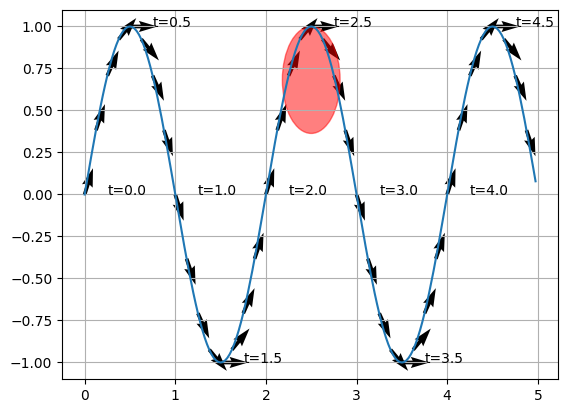

In [6]:
d = 20
fig = plt.plot(S[0], S[1])
for x_i, y_i, t_i in zip(S[0][::d], S[1][::d], t[::d]):
    plt.text(x_i + 0.25, y_i, 't={}'.format(t_i))
    
dv = 5
for x_i, y_i, u_i, v_i in zip(S[0][::dv], S[1][::dv], U[::dv], V[::dv]):
    plt.quiver(x_i, y_i, u_i, v_i)
    
t_i = 100
r = 1.0 / K[t_i]
circle1 = plt.Circle((S[0][t_i], S[1][t_i] + r), r, alpha=0.5, color='red')
plt.gcf().gca().add_artist(circle1)

plt.grid()
plt.show()

## Plot Curvature over t

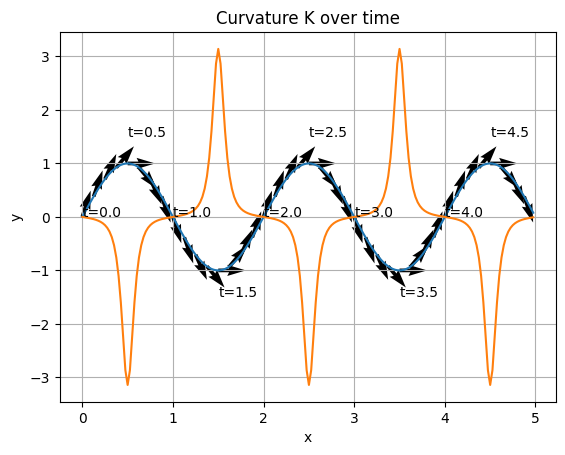

In [7]:
d = 20
fig = plt.plot(S[0], S[1])
for x_i, y_i, t_i in zip(S[0][::d], S[1][::d], t[::d]):
    plt.text(x_i, y_i + y_i / 2, 't={}'.format(t_i))
    
dv = 5
for x_i, y_i, u_i, v_i in zip(S[0][::dv], S[1][::dv], U[::dv], V[::dv]):
    plt.quiver(x_i, y_i, u_i, v_i)
    
plt.plot(t, K)

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvature K over time')
plt.show()


# The Concept of Divergence

Imagine a vector field represents the velocity of a fluid (like water or air).

*   **Positive Divergence ($\text{div} \mathbf{F} > 0$):** This means the point is a **source** of the fluid. More fluid is flowing *out* of the point than is flowing in. The fluid is expanding or "diverging." (Think of a faucet turned on 💧).
*   **Negative Divergence ($\text{div} \mathbf{F} < 0$):** This means the point is a **sink** of the fluid. More fluid is flowing *into* the point than is flowing out. The fluid is contracting or "converging." (Think of a drain 🕳️).
*   **Zero Divergence ($\text{div} \mathbf{F} = 0$):** This means the flow is **incompressible** or **solenoidal**. The amount of fluid flowing in equals the amount flowing out. (Think of a steady, smooth river flow 🌊).

---

# The Formula 📝

Divergence is calculated using the **dot product** of the **nabla operator** ($\nabla$) and the vector field $\mathbf{F}$. The result is a **scalar function** (a single number, not a vector).

For a 2D vector field $\mathbf{F}(x, y) = \langle P(x, y), Q(x, y) \rangle$:

$$
\text{div} \mathbf{F} = \nabla \cdot \mathbf{F} = \frac{\partial P}{\partial x} + \frac{\partial Q}{\partial y}
$$

For a 3D vector field $\mathbf{F}(x, y, z) = \langle P, Q, R \rangle$:

$$
\text{div} \mathbf{F} = \nabla \cdot \mathbf{F} = \frac{\partial P}{\partial x} + \frac{\partial Q}{\partial y} + \frac{\partial R}{\partial z}
$$

---

# Example: $\mathbf{F}(x, y) = \langle 2x, 2\cos y \rangle$

Let's find the divergence of the given vector field.

### Step 1: Identify the Components

The vector field is $\mathbf{F}(x, y) = \langle P, Q \rangle$, where:

$$
P(x, y) = 2x
$$
$$
Q(x, y) = 2\cos y
$$

### Step 2: Calculate the Partial Derivatives

1.  **Partial derivative of $P$ with respect to $x$:**
    $$
    \frac{\partial P}{\partial x} = \frac{\partial}{\partial x} (2x) = 2
    $$

2.  **Partial derivative of $Q$ with respect to $y$:**
    $$
    \frac{\partial Q}{\partial y} = \frac{\partial}{\partial y} (2\cos y) = -2\sin y
    $$

### Step 3: Calculate the Divergence

Add the partial derivatives together:

$$
\text{div} \mathbf{F} = \frac{\partial P}{\partial x} + \frac{\partial Q}{\partial y}
$$

$$
\text{div} \mathbf{F} = 2 + (-2\sin y)
$$

$$
\text{div} \mathbf{F} = 2 - 2\sin y
$$

### Interpretation

The divergence is a function of $y$.

*   When $\sin y = 1$ (e.g., $y = \pi/2$), the divergence is $2 - 2(1) = 0$. The flow is incompressible (no net change in volume) along this line.
*   When $\sin y = -1$ (e.g., $y = 3\pi/2$), the divergence is $2 - 2(-1) = 4$. This is a positive divergence, meaning the flow is strongly **diverging** (spreading out) along this line.
*   When $\sin y = 0$ (e.g., $y = 0$ or $y = \pi$), the divergence is $2 - 2(0) = 2$. This is a positive divergence, meaning the flow is **diverging** (spreading out) along this line.

## Plot Vector Field

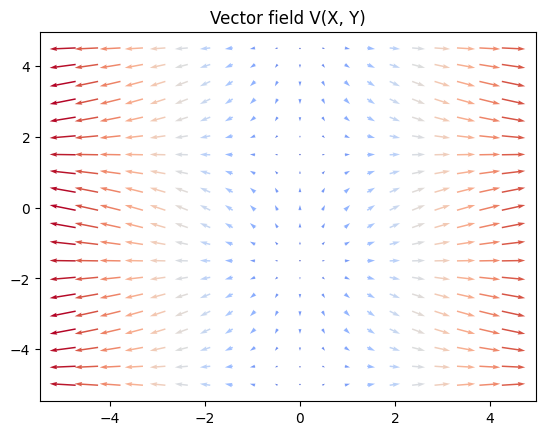

In [8]:
X = np.arange(-5, 5, 0.025)
Y = np.arange(-5, 5, 0.025)
Xm, Ym = np.meshgrid(X, Y)
df = lambda x, y : (2 * x, 2 * np.cos(y))
U, V = df(Xm, Ym)

plt.figure()
plt.title('Vector field V(X, Y)')
Clr = np.hypot(U, V)
d = 20
Q = plt.quiver(Xm[::d, ::d], Ym[::d, ::d], U[::d, ::d], V[::d, ::d],
               Clr[::d, ::d], pivot='mid', cmap=cm.coolwarm)

## Plot Divergence

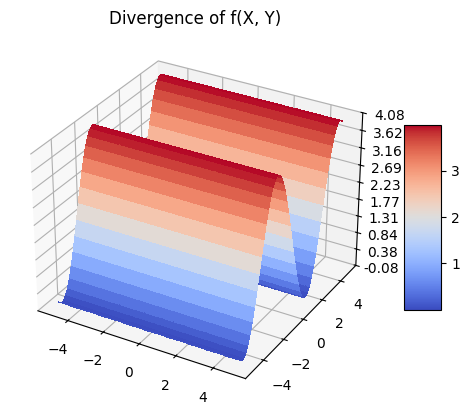

In [9]:
divergence = lambda x, y : 2 - 2 * np.sin(y)

plot_function(X, Y, divergence, title='Divergence of f(X, Y)')


# The Concept of Curl

Imagine the vector field represents the flow of water. If you drop a small paddlewheel into the water:

*   **Non-Zero Curl:** If the paddlewheel starts to spin, the curl is non-zero. The magnitude of the curl tells you how fast it spins, and the direction of the curl vector tells you the axis of rotation (using the right-hand rule). (Think of a whirlpool 🌪️).
*   **Zero Curl:** If the paddlewheel does not spin, the curl is zero. Such a vector field is called **irrotational** or **conservative**. (Think of a smooth, straight flow).

Unlike divergence, which is a scalar, the curl of a vector field is a **vector field** itself.

---

# The Formula 📝

Curl is calculated using the **cross product** of the **nabla operator** ($\nabla$) and the vector field $\mathbf{F}$.

$$
\text{curl} \mathbf{F} = \nabla \times \mathbf{F}
$$

For a 3D vector field $\mathbf{F}(x, y, z) = \langle P, Q, R \rangle$, the curl is calculated as the determinant of a matrix:

$$
\text{curl} \mathbf{F} = \begin{vmatrix} \mathbf{i} & \mathbf{j} & \mathbf{k} \\ \frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z} \\ P & Q & R \end{vmatrix}
$$

### Curl for 2D Fields

For a 2D vector field $\mathbf{F}(x, y) = \langle P(x, y), Q(x, y) \rangle$, the $R$ component is zero, and the partial derivatives with respect to $z$ are zero. The curl vector will only have a $\mathbf{k}$ (or $z$) component:

$$
\text{curl} \mathbf{F} = \left( \frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \right) \mathbf{k}
$$

---

# Example: $\mathbf{F}(x, y) = \langle x \sin y, y \cos x \rangle$

Let's find the curl of the given 2D vector field.

### Step 1: Identify the Components

The vector field is $\mathbf{F}(x, y) = \langle P, Q \rangle$, where:

$$
P(x, y) = x \sin y
$$
$$
Q(x, y) = y \cos x
$$

### Step 2: Calculate the Required Partial Derivatives

We need $\frac{\partial Q}{\partial x}$ and $\frac{\partial P}{\partial y}$.

1.  **Partial derivative of $Q$ with respect to $x$:** Treat $y$ as a constant.
    $$
    \frac{\partial Q}{\partial x} = \frac{\partial}{\partial x} (y \cos x) = y (-\sin x) = -y \sin x
    $$

2.  **Partial derivative of $P$ with respect to $y$:** Treat $x$ as a constant.
    $$
    \frac{\partial P}{\partial y} = \frac{\partial}{\partial y} (x \sin y) = x (\cos y) = x \cos y
    $$

### Step 3: Calculate the Curl

Substitute the results into the 2D curl formula:

$$
\text{curl} \mathbf{F} = \left( \frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \right) \mathbf{k}
$$

$$
\text{curl} \mathbf{F} = (-y \sin x - x \cos y) \mathbf{k}
$$

### Interpretation

The curl is a vector pointing in the $z$-direction. The magnitude of the curl, $|-y \sin x - x \cos y|$, tells you the strength of the rotation at any point $(x, y)$. Since the curl is generally non-zero, this vector field is **rotational**.

## Plot Vector Field

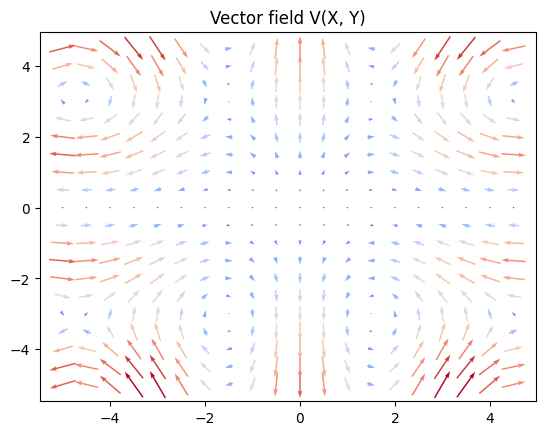

In [10]:
X = np.arange(-5, 5, 0.025)
Y = np.arange(-5, 5, 0.025)
Xm, Ym = np.meshgrid(X, Y)
df = lambda x, y : (x * np.sin(y), y * np.cos(x))
U, V = df(Xm, Ym)

plt.figure()
plt.title('Vector field V(X, Y)')
Clr = np.hypot(U, V)
d = 20
Q = plt.quiver(Xm[::d, ::d], Ym[::d, ::d], U[::d, ::d], V[::d, ::d],
               Clr[::d, ::d], pivot='mid', cmap=cm.coolwarm)

## Plot Curl

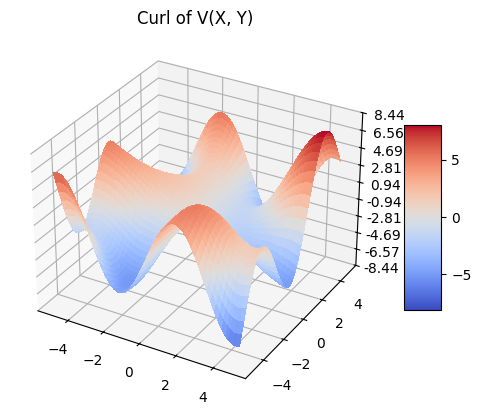

In [11]:
curl = lambda x, y : -y * np.sin(x) - x * np.cos(y)

plot_function(X, Y, curl, title='Curl of V(X, Y)')